In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conclusion

In this project, we examined data for churn prediction. We've tested three different models to predict the 'churn_risk_score': Logistic Regression, Decision Tree, and CatBoost. To compare the models' performance, we chose Precision, Recall, F1 and ROC AUC metric.

Let's have a look at how our models perform.

In [2]:
# load df_metrics
df_metrics = pd.read_pickle('./data/df_metrics.pkl')

## Comparison of Model Performance Metrics

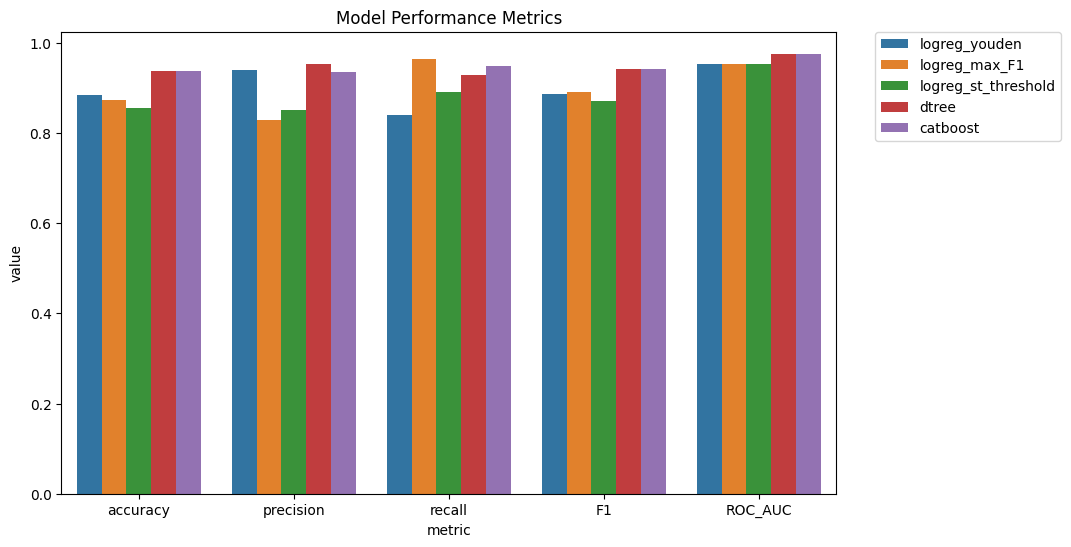

In [3]:
# melt the DataFrame, to convert it to long-formats
df_melted = df_metrics.melt(id_vars='model', var_name='metric', value_name='value')

# create grouped Barplot
plt.figure(figsize=(10,6))
sns.barplot(x='metric', y='value', hue='model', data=df_melted)
plt.title('Model Performance Metrics')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In the grouped bar plot, we compare 5 different metrics for our models. The first three bars of a metric show Logistic Regression Models that were eventually optimized with respect to Youden´s statistic or F1 score. The last two bars represent tree-like models (a pruned decision tree and a hyperparameter-tuned catboost model).

Overall the tree-like models show superior metrics compared to those obtained with Logistic Regression. Usually, their metrics are close to each other (<2% difference).
The Logistic Regression Model that was optimized to Youden`s statistic shows a comparable precision (approx. 94%/ for comparison of all values, see table below) to the tree-based model but an inferior recall metrics in comparison (84% vs. 93-95%). The Logistic Regression optimized for F1 achieved the highest recall (>96%) for the sake of an inferior precision score (83% vs. 94% for tree-based models). Therefore, we conclude that a tree-baesd model is the best choice for churn prediction. 

We recommend to use the pruned decision tree over the catboost model. The decision tree allows a white-box interpretation of the model; unlike the catboost that is based on 1000 trees. Considering the principle of Occam's razor, the simplest explaination/model should be preferred over more complex explainations/models: The pruned decision tree model yields in a comparable performance with respect to all relevant metrics.

In [4]:
# overview of model metrics as a table
df_metrics.reset_index().drop("index", axis = 1)

,model,accuracy,precision,recall,F1,ROC_AUC
0,logreg_youden,0.883386,0.939331,0.839905,0.886840,0.953799
1,logreg_max_F1,0.872876,0.829390,0.964806,0.891988,0.953799
2,logreg_st_threshold,0.855744,0.851252,0.890447,0.870409,0.953799
3,dtree,0.936654,0.954039,0.928288,0.940987,0.975058
4,catboost,0.937518,0.936342,0.949722,0.942985,0.975934


## Comparison of Feature Importance and Error Evaluation

Similar features are important for all models: 'membership_category' and 'points_in_wallet'. Differences can be found with regarding the number of important features. Decision tree is solely based on 'membership_category' and 'points_in_wallet', while catboost is also based on feedback as 3rd important feature and further features with a minor impact. In contrast, the Logistic Regression Models' most important feature is 'feedback' with 'membership_category' and 'points_in_wallet' just on rank two and four. Another important feature (rank 3) is 'complaint_status' which does not seem to be of any additional predictive power for the tree-like models.

These findings are also reflected in the error evaluation. In general, high 'points_in_wallet', a high 'membership_category' and a positive feedback lead to a low churn risk. Unlike the findings of the feature importance, 'avg_transaction_value' seems to be important (high values, low churn risk). The hypothesis that a high correlation between 'avg_transaction_value' and 'points_in_wallet' exists (features that could be potentially related) could not be confirmed (Pearson's correlation of 0.09). 

## Concluding Remarks

1. Our models confirm the outstanding importance for the membership category as the most important variable to predict churn risks. At the same time, clients with a high membership category are the most valuable customer group. However, the membership category as a variable might reflect the classic 'chicken or the egg' problem.

- Are satisfied customers more likely to upgrade to a higher category?
- Does a client downgrade from a high membership category to a lower before churning?

For both questions, a more detailed history of a clients subscription might give valuable insights to further improve the business model.

Moreover, we were surprised that interaction-related data did not show any predicitve power (e.g., 'avg_time_spent').

2. Overall, the decision tree as the model of choice allows a strong predicitve importance for all relevant metrics. A ROC AUC score of 98% underlines the robustness of the prediction and also precison of 95%, recall of 93%, F1 of 94% and accuracy of 94% show strong results.